# Practica 2: Convolutional Neural Network (CNN)
*Elaborado por:

Luis Fernando Becerra, BEDA Aprendizaje de Máquinas 2024-1S - 2025-1S

Andres Esteban Marin Manco, BEDA Aprendizaje de Máquinas 2025-1S*

# <b>Clasificación de Imágenes con Redes Neuronales Convolucionales (CNN)</b></font>

Esta guía muestra paso a paso cómo entrenar una **Red Neuronal Convolucional (CNN)** para resolver un problema clásico de visión por computador: la **clasificación de imágenes**.

El objetivo es utilizar una CNN para clasificar imágenes del conjunto de datos **CIFAR-10**, el cual contiene 60,000 imágenes a color, de tamaño 32x32 píxeles, distribuidas en 10 categorías como: aviones, gatos, automóviles, perros, etc.

<br>

## <b>¿Cómo lo haremos?</b></font>

Usaremos la **API Secuencial de Keras**, una interfaz de alto nivel provista por TensorFlow que permite construir modelos de manera muy intuitiva. Gracias a esta API, podemos:

- **Definir la arquitectura de la red** en unas pocas líneas de código.
- **Compilar y entrenar el modelo** de forma eficiente.
- **Evaluar el desempeño del modelo** con funciones predefinidas.
- **Visualizar resultados** fácilmente con herramientas como Matplotlib.

<br>

## <b>¿Qué aprenderás?</b></font>
A lo largo de esta guía aprenderás a:

- Cargar y preprocesar datos de imágenes.
- Construir una arquitectura CNN desde cero.
- Entrenar el modelo y monitorear su rendimiento.
- Evaluar los resultados obtenidos y realizar predicciones.

<br>

<p align="center">
  <img src="https://i0.wp.com/developersbreach.com/wp-content/uploads/2020/08/cnn_banner.png?fit=1400%2C658&ssl=1" width="800"/>
</p>



### Importar librerias

In [1]:
##
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import datasets

2025-07-05 08:26:46.696560: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751722006.720637    6432 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751722006.728647    6432 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751722006.746754    6432 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751722006.746804    6432 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751722006.746806    6432 computation_placer.cc:177] computation placer alr

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
# Configurar uso de GPU (si está disponible)
if gpus:
	try:
		# Configurar límite de memoria GPU
		tf.config.experimental.set_memory_growth(gpus[0], False)
		# Establecer límite de memoria (por ejemplo, 4096 MB)
		tf.config.experimental.set_virtual_device_configuration(
			gpus[0],
			[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)]
		)
		print("TensorFlow configurado para usar memoria GPU completa (1024 MB).")
	except RuntimeError as e:
		print(e)
else:
	print("No se detectaron GPUs.")

TensorFlow configurado para usar memoria GPU completa (1024 MB).


## <b>Descarga y preparación del conjunto de datos CIFAR-10</b></font>

El conjunto de datos **CIFAR-10** contiene **60.000 imágenes en color**, de tamaño **32x32 píxeles**, distribuidas en **10 clases diferentes**, como aviones, gatos, automóviles, camiones, entre otros.

Cada clase tiene exactamente **6.000 imágenes**. El conjunto de datos se divide en:

- **50.000 imágenes de entrenamiento**
- **10.000 imágenes de prueba**

Todas las clases son **mutuamente excluyentes**, lo que significa que cada imagen pertenece a una única categoría.

## <b>Cargar los datos en memoria</b></font>

Puedes cargar el conjunto de datos directamente desde la API de Keras usando la siguiente instrucción:



In [3]:
#Cargar datos entrenamiento y prueba
###
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

Un paso importante de preprocesamiento de los datos a usar con redes profundas es la normalización. Este paso ayuda a los optimizadores a converger más rapido, sin que ninguna de las caracteristicas tenga mayor peso en la selección de la dirección de la convergencia. En el caso de las imágenes en escala de grises y RGB, la normalización es muy sencilla. Usualmente las imágenes en escala de grises (1 sola capa) o RGB (3 capas correspondientes a los colores rojo, verde y azul) se encuentran en formato UINT8, es decir, que cada prixel se representa por valores de 0 a 255. Por lo tanto, para la normalización de los datos solo requerimos dividir por 255.

Nota: cuando se trabajan con otros tipos de imágenes (por ejemplo satelitales) es importante revisar el formato de los datos, o realizar una normalización MIN-MAX.

In [4]:
#Normalización de los datos
###
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

## <b>Verificar los datos</b></font>

Para asegurarnos de que el conjunto de datos se ha cargado correctamente, visualizamos las **primeras 25 imágenes de entrenamiento** junto con su **etiqueta(nombre) de clase**.

Esto nos permite:
- Confirmar que las imágenes están bien formateadas.
- Ver que las etiquetas corresponden correctamente a su clase.

Cada imagen se muestra en una cuadrícula de 5x5 con su nombre de clase debajo.

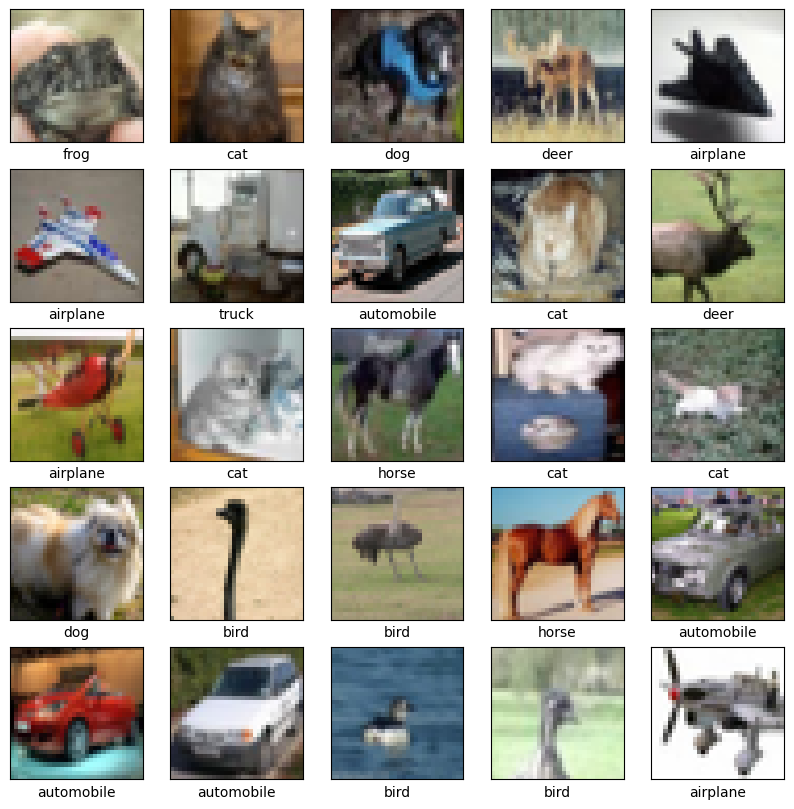

In [5]:
#Visualización de los datos
#Nombre de las clases
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
#Visualización de las imagenes
plt.figure(figsize=(10,10))
for i in range(25, 50):
    plt.subplot(5,5,i+1-25)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

##  Crear la arquitectura

Vamos a definir una arquitectura común usando una pila de capas convolucionales (Conv2D) y de pooling (MaxPooling2D).

Como entrada, una CNN toma tensores de la forma pixeles_por_fila X pixels_por_columna X no_canales (image_height, image_width, color_channels). Las imágenes en escala de grises solo cuentan con 1 canal, en cambio las imágenes que capturamos con nuestros celulares o camaras convencionales usualmente tienen 3 canales correspondientes al RGB.

En nuestro ejemplo la dimesión de los datos es de 32x32x3. Con estas dimensiones configuramos la capa de entrada.

In [6]:
#Definición del modelo
model = Sequential()

#Capa convolucional y pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

#Capa convolucional y pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

#Capa convolucional
model.add(Conv2D(128, (3, 3), activation='relu'))


/home/ezapataq/GitHub/AnalyticsMaster/MachineLearning/Workshops/W2/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1751722013.532218    6432 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1024 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


Recordemos que con el metodo summary() podemos revisar la arquitectura de nuestra red, así como ver el número de parámetros que debemos entrenar.

In [7]:
##
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,248 (364.25 KB)

 Trainable params: 93,248 (364.25 KB)

 Non-trainable params: 0 (0.00 B)

En el resumen del modelo deberias ver que la salida de cada capa Conv2D y MaxPooling2D es un tensor 3D de forma (altura, anchura, canales). Las dimensiones de anchura y altura tienden a reducirse a medida que se profundiza en la red, esto por el efecto del pooling. El número de canales de salida para cada capa Conv2D se controla mediante el primer argumento (por ejemplo, 32 o 64). Normalmente, a medida que la anchura y la altura se reducen, puedes permitirte (computacionalmente) añadir más canales de salida en cada capa Conv2D.

Para completar el modelo, vamos a introducir el último tensor de salida (de la forma (4, 4, 64)) en una o más capas Densas para realizar la clasificación. Las capas densas toman vectores como entrada (que son 1D), mientras que la salida actual es un tensor 3D. Por lo cual, es nesario en primer lugar "aplanar" el tensor (Flatten()), y a continuación, añadir una o más capas densas. CIFAR tiene 10 clases de salida, por lo que se utiliza una capa Densa final con 10 salidas.

Recuerda: El número de capas convolucionales y densas, así como el número de filtros convolucionales, tipo de pooling, número de neuronas ocultas, funciones de activación, son parametros que debe determinar el ingeniero ML.

Visualiza la arquitectura completa de tu modelo:

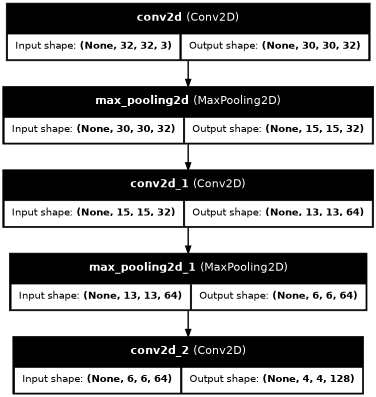

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(model,
           show_shapes=True,
           show_layer_names=True,
           dpi=50,
           #rankdir="LR" #LR:plotea horizontal, TB:plotea hacia abajo (por defecto)
)

##<b>Entendiendo el resumen del modelo</b></font>

En el resumen del modelo (`model.summary()`), puedes observar que la salida de cada capa `Conv2D` y `MaxPooling2D` es un **tensor 3D** con forma:


| Capa             | Tipo          | Forma de salida          | Parámetros |
|------------------|---------------|---------------------------|------------|
| `conv2d`         | Conv2D        | (None, 30, 30, 32)        | 896        |
| `max_pooling2d`  | MaxPooling2D  | (None, 15, 15, 32)        | 0          |
…
<br

## ¿Qué ocurre a medida que profundizamos en la red?</b></font>

- **Alto y ancho**: Tienden a **disminuir** por efecto de las convoluciones y el `MaxPooling`.
- **Número de canales (depth)**: Se **incrementa** progresivamente para capturar más características complejas.

Esto responde a una práctica común: a medida que reducimos el tamaño espacial de las imágenes (menos ancho y alto), podemos **aumentar la profundidad** (más filtros) sin que el costo computacional se dispare.

Por ejemplo:
- Una capa `Conv2D(32, ...)` genera 32 mapas de características.
- Una capa `Conv2D(64, ...)` genera 64 mapas, lo cual permite aprender representaciones más ricas.

<br>

Este patrón (reducir resolución y aumentar profundidad) es típico en arquitecturas CNN eficientes y escalables.


## <b>Añadir capas densas al modelo</b></font>

Para completar el modelo, debemos **transformar la salida de la base convolucional** en una representación que pueda ser interpretada por una capa de clasificación.

Actualmente, la salida es un tensor de forma **(4, 4, 64)**, es decir, un volumen tridimensional.  
Las **capas densas (`Dense`) requieren vectores 1D**, así que primero debemos **aplanar** este tensor con una capa `Flatten`.

<br>

## <b>Estructura final</b></font>

1. **`Flatten`**: Convierte (4, 4, 64) → 1024 unidades.
2. **`Dense(64)`**: Capa oculta totalmente conectada con activación ReLU.
3. **`Dense(10)`**: Capa de salida con 10 unidades (una por cada clase del CIFAR-10).

<br>


_<font color="purple"><b>Imagen de referencia de transformación a capa flattened</b></font>_

<p align="center">
  <img src="https://towardsdatascience.com/wp-content/uploads/2022/06/1N74xher1f5gJSHY-_o_rQQ.png" width="200"/>
</p>


In [9]:
#Codigo para agregar capas
##
# Flatten the 3D tensor to 1D vector
model.add(Flatten())

# Add dense hidden layer
model.add(Dense(64, activation='relu'))

# Add output layer with 10 units for CIFAR-10 classes
model.add(Dense(10, activation='softmax'))

## Visualiza la arquitectura completa de tu modelo</b></font>

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

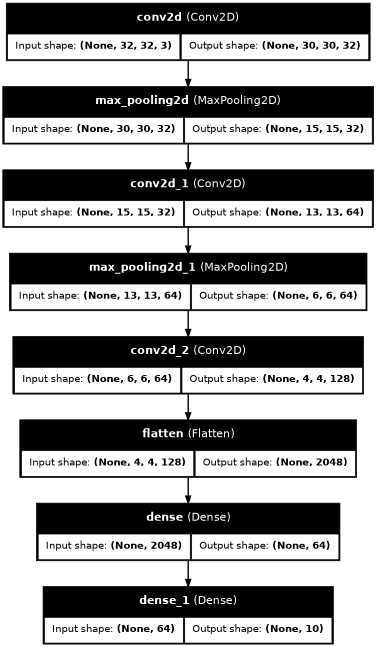

In [11]:
plot_model(model,
           show_shapes=True,
           show_layer_names=True,
           dpi=50,
           #rankdir="LR" #LR:plotea horizontal, TB:plotea hacia abajo (por defecto)
)

El resumen del modelo muestra que la salida de la última capa convolucional, con forma **(4, 4, 64)**, fue **aplanada** por la capa `Flatten` a un vector de **1024 unidades** antes de pasar por dos capas densas.

Este vector 1D fue luego procesado por:

- Una capa densa intermedia con **64 neuronas** y activación `ReLU`.
- Una **capa de salida con 10 neuronas**, correspondiente a las **10 clases** del conjunto CIFAR-10.

## <b>Compile y entrene el modelo</b></font>

<p align="center">
  <img src="https://i.gifer.com/origin/b4/b4d657e7ef262b88eb5f7ac021edda87.gif" width="80"/>
</p>

> ⚠️ <font color="red"><b>Oops... ¿entrenando en CPU?</b></font>

Entrenar redes neuronales en CPU puede ser **considerablemente más lento**, especialmente con datasets como CIFAR-10 (imágenes).

<p align="center">
  <img src="https://media.tenor.com/NCp49Vx5_P0AAAAM/spanky-waiting.gif"/>
</p>




<br>

**Recomendación:** Si estás usando Google Colab, activa la **GPU** y ahorra tiempo:

1. Ve a `Entorno de ejecución` → `Cambiar tipo de entorno de ejecución`.
2. En "Acelerador por hardware", selecciona **GPU T4**.
3. Vuelve a ejecutar toooooodas las celdas.

In [12]:
#Función de perdida
from keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer='adam',
			  loss=SparseCategoricalCrossentropy(from_logits=True),
			  metrics=['accuracy'])

#Parametros para entrenamiento
batch_size = 64
epochs = 30

#Entrenamiento
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,
		  validation_data=(test_images, test_labels))

2025-07-05 08:26:55.506537: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2025-07-05 08:26:56.148461: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/30


/home/ezapataq/GitHub/AnalyticsMaster/MachineLearning/Workshops/W2/.venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
I0000 00:00:1751722018.745164    6574 service.cc:152] XLA service 0x7ca98c005470 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751722018.745197    6574 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-07-05 08:26:58.787988: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1751722019.151446    6574 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-07-05 08:26:59.482924: I external/local_xla/xla/servic

 26/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1161 - loss: 2.3004

I0000 00:00:1751722021.813591    6574 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3374 - loss: 1.7937

2025-07-05 08:27:06.929123: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.9 = (f32[16,32,30,30]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,3,32,32]{3,2,1,0} %bitcast.2247, f32[32,3,3,3]{3,2,1,0} %bitcast.2254, f32[32]{0} %bitcast.2756), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1/convolution" source_file="/home/ezapataq/GitHub/AnalyticsMaster/MachineLearning/Workshops/W2/.venv/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-07-05 08:27:06.999272: I external/local_xla/xla/service/gpu/autotuning/conv_a

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3381 - loss: 1.7919

2025-07-05 08:27:09.826154: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.9 = (f32[64,32,30,30]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,3,32,32]{3,2,1,0} %bitcast.540, f32[32,3,3,3]{3,2,1,0} %bitcast.547, f32[32]{0} %bitcast.549), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1/convolution" source_file="/home/ezapataq/GitHub/AnalyticsMaster/MachineLearning/Workshops/W2/.venv/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-07-05 08:27:09.924717: I external/local_xla/xla/service/gpu/autotuning/conv_algo

782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.3382 - loss: 1.7916 - val_accuracy: 0.5002 - val_loss: 1.3524
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5630 - loss: 1.2350 - val_accuracy: 0.6151 - val_loss: 1.0983
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6370 - loss: 1.0384 - val_accuracy: 0.6535 - val_loss: 0.9883
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6768 - loss: 0.9184 - val_accuracy: 0.6631 - val_loss: 0.9843
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7164 - loss: 0.8168 - val_accuracy: 0.6963 - val_loss: 0.8799
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7386 - loss: 0.7463 - val_accuracy: 0.7169 - val_loss: 0.8333
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7630 - loss: 0.6826 - val_accuracy: 0.7200 - val_loss: 0.8469
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7795 - loss: 0.6312 - val_accuracy: 0.7134 - va

### Evalúe el modelo

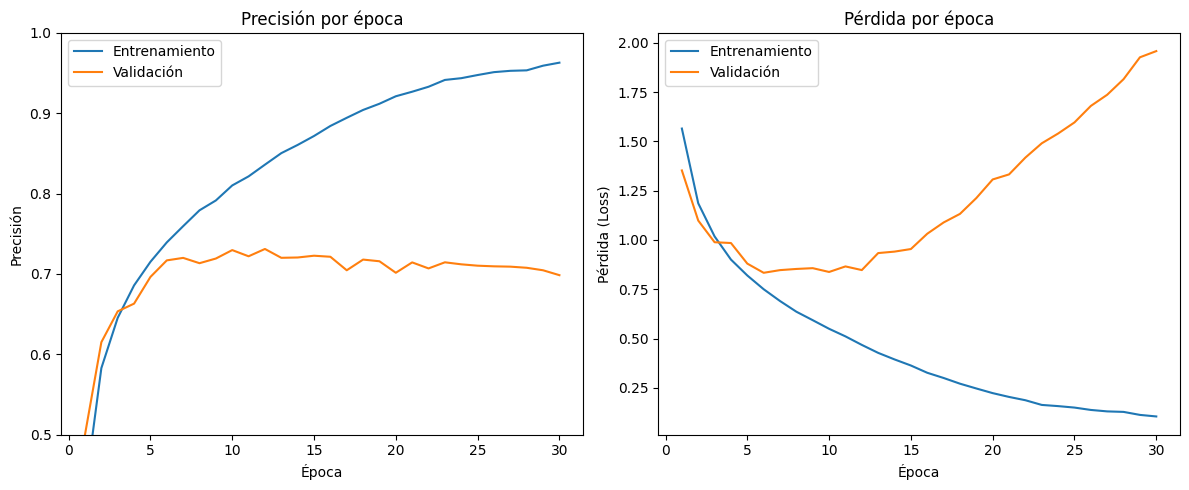

In [13]:
#Visualización de resultados de entrenamiento y validación
epochs = range(1, len(history.history["accuracy"]) + 1)
plt.figure(figsize=(12, 5))

#Grafica accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history["accuracy"], label='Entrenamiento')
plt.plot(epochs, history.history["val_accuracy"], label='Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.ylim([0.5, 1])
plt.title('Precisión por época')
plt.legend()

#Graficar loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history["loss"], label='Entrenamiento')
plt.plot(epochs, history.history["val_loss"], label='Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida (Loss)')
plt.title('Pérdida por época')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

2025-07-05 08:29:39.315838: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.9 = (f32[32,32,30,30]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,32,32]{3,2,1,0} %bitcast.540, f32[32,3,3,3]{3,2,1,0} %bitcast.547, f32[32]{0} %bitcast.549), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1/convolution" source_file="/home/ezapataq/GitHub/AnalyticsMaster/MachineLearning/Workshops/W2/.venv/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-07-05 08:29:39.387373: I external/local_xla/xla/service/gpu/autotuning/conv_algo

313/313 - 2s - 5ms/step - accuracy: 0.6985 - loss: 1.9575
0.6984999775886536


## <b>Evaluación del modelo</b></font>

Nuestra sencilla CNN debería haber alcanzado una **precisión en los datos de prueba superior al 70%**, lo cual es un resultado bastante sólido considerando que se construyó con apenas unas pocas líneas de código utilizando la API secuencial de Keras.

Esto demuestra que incluso arquitecturas simples pueden lograr **buen rendimiento en tareas básicas de clasificación de imágenes**, como CIFAR-10.



### ¿Quieres explorar otro enfoque?
## <b></b></font>

Para una implementación más flexible y detallada, puedes revisar el ejemplo de TensorFlow:

**[TensorFlow 2 Quickstart for Experts](https://www.tensorflow.org/tutorials/quickstart/advanced)**

Este enfoque utiliza:

- La **API de subclases de Keras**, que permite definir arquitecturas más personalizadas.
- El ciclo de entrenamiento manual con **`tf.GradientTape`**, ideal para aprender cómo funciona el entrenamiento paso a paso.

Recomendado si buscas mayor control y aprendizaje más profundo sobre el funcionamiento interno de TensorFlow.

In [15]:
#Funciones de sklearn para metricas de desempeño
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
import numpy as np

In [16]:
#Predicción
pred_labels = model.predict(test_images)
y = np.argmax(pred_labels,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1000
           1       0.81      0.84      0.82      1000
           2       0.54      0.66      0.59      1000
           3       0.57      0.41      0.48      1000
           4       0.67      0.66      0.66      1000
           5       0.59      0.62      0.61      1000
           6       0.81      0.74      0.77      1000
           7       0.75      0.73      0.74      1000
           8       0.77      0.83      0.80      1000
           9       0.76      0.76      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

kappa: 0.6649999999999999


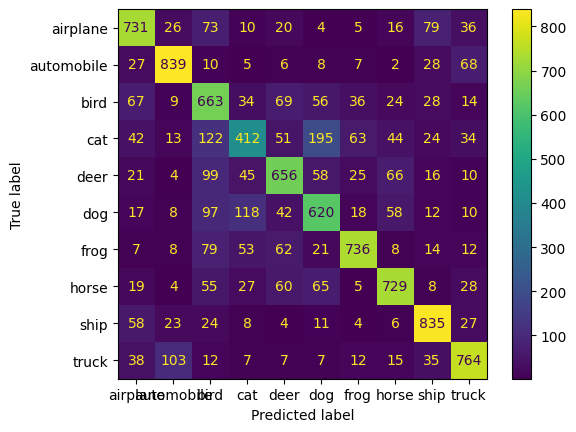

In [17]:
# Métricas de desempeño
cm_cnn = confusion_matrix(test_labels, y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=class_names)
disp.plot()
print(classification_report(test_labels, y))
print("kappa: " + str(cohen_kappa_score(test_labels, y)))

# ¡Gran trabajo!